In [1]:
import matplotlib.pyplot as plt
import copy
import random as r
import numpy as np
from scipy.integrate import odeint
import math
import matplotlib

arquivo = open("Data/GRN5_DATA.txt", 'r')

x = []
A = []
B = []
C = []
D = []
E = []

for linha in arquivo:
    elementos = linha.split()
    x.append(float(elementos[0].strip()))
    A.append(float(elementos[1].strip()))
    B.append(float(elementos[2].strip()))
    C.append(float(elementos[3].strip()))
    D.append(float(elementos[4].strip()))
    E.append(float(elementos[5].strip()))



maximo_A = max(A)
maximo_B = max(B)
maximo_C = max(C)
maximo_D = max(D)
maximo_E = max(E)



maximos = [maximo_A, maximo_B, maximo_C, maximo_D, maximo_E]

A_ORIGINAL = copy.deepcopy(A)
B_ORIGINAL = copy.deepcopy(B)
C_ORIGINAL = copy.deepcopy(C)
D_ORIGINAL = copy.deepcopy(D)
E_ORIGINAL = copy.deepcopy(E)


maior_todos = max(maximos)


Y0 = []
Y0.append(A[0])
Y0.append(B[0])
Y0.append(C[0])
Y0.append(D[0])
Y0.append(E[0])


IND_SIZE = 15#Tamanho do indivíduo (quantidade de coeficientes)
MIN_K = 0.1#Menor valor que K pode assumir
MAX_K = 1#Maior valor que K pode assumir
MIN_N = 1#Menor valor que N pode assumir
MAX_N = 25#Maior valor que N pode assumir
MIN_TAU = 0.1#Menor valor que TAU pode assumir
MAX_TAU = 5#Maior valor que TAU pode assumir
MIN_STRATEGY = 0.1 #Menor valor que a estratégia pode assumir
MAX_STRATEGY = 10#Maior valor que a estratégia pode assumir
TAU_SIZE = 5
N_SIZE = 5
K_SIZE = 5
#INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]


#dobra_pontos = [0.0, 0.7347, 1.4694, 2.2041, 2.9388, 3.6735, 4.4082, 5.1429, 5.8776, 6.6123, 7.3469, 8.0816, 8.8163, 9.551, 10.2857, 11.0204, 11.7551, 12.4898, 13.2245, 13.9592, 14.6939, 15.4286, 16.1633, 16.898, 17.6327, 18.3674, 19.102, 19.8367, 20.5714, 21.3061, 22.0408, 22.7755, 23.5102, 24.2449, 24.9796, 25.7143, 26.449, 27.1837, 27.9184, 28.6531, 29.3878, 30.1225, 30.8571, 31.5918, 32.3265, 33.0612, 33.7959, 34.5306, 35.2653, 36.0, 36.7347, 37.4694, 38.2041, 38.9388, 39.6735, 40.4082, 41.1429, 41.8776, 42.6122, 43.3469, 44.0816, 44.8163, 45.551, 46.2857, 47.0204, 47.7551, 48.4898, 49.2245, 49.9592, 50.6939, 51.4286, 52.1633, 52.898, 53.6327, 54.3673, 55.102, 55.8367, 56.5714, 57.3061, 58.0408, 58.7755, 59.5102, 60.2449, 60.9796, 61.7143, 62.449, 63.1837, 63.9184, 64.6531, 65.3878, 66.1224, 66.8571, 67.5918, 68.3265, 69.0612, 69.7959, 70.5306, 71.2653, 72.0, 72.7347]
dobra_pontos = copy.deepcopy(x)
POPULACAO = []
APTIDAO = []


LAMBDA_FILHOS = []
APTIDAO_FILHOS = []

def twoBody(y, t, tauA, kA, nA, tauB, kB, nB, tauC, kC, nC, tauD, kD, nD, tauE, kE, nE):
    ydot = np.empty((5,))
    
    ydot[0] = ((1-(pow((y[4]/maximo_E),nA))/(pow((y[4]/maximo_E),nA)+pow(kA, nA)))-(y[0]/maximo_A)) / tauA

    ydot[1] = (((pow((y[0]/maximo_A), nB))/(pow((y[0]/maximo_A),nB) + pow(kB, nB))) - (y[1]/maximo_B)) / tauB

    ydot[2] = (((pow((y[1]/maximo_B), nC))/(pow((y[1]/maximo_B),nC) + pow(kC, nC))) - (y[2]/maximo_C)) / tauC

    ydot[3] = (((pow((y[2]/maximo_C), nD))/(pow((y[2]/maximo_C),nD) + pow(kD, nD))) - (y[3]/maximo_D)) / tauD

    ydot[4] = (((pow((y[3]/maximo_D), nE))/(pow((y[3]/maximo_D),nE) + pow(kE, nE))) - (y[4]/maximo_E)) / tauE

    

    return ydot


def organiza_pontos(solucao):
    pA = []
    pB = []
    pC = []
    pD = []
    pE = []
    pF = []
    pG = []
    pH = []
    pI = []
    pJ = []
    for pontos in range(len(solucao)):
        if pontos % 2 == 0 or pontos % 2 == 1:
            pA.append(solucao[pontos][0])
            pB.append(solucao[pontos][1])
            pC.append(solucao[pontos][2])
            pD.append(solucao[pontos][3])
            pE.append(solucao[pontos][4])
            #pF.append(solucao[pontos][5])
            #pG.append(solucao[pontos][6])
            #pH.append(solucao[pontos][7])
            #pI.append(solucao[pontos][8])
            #pJ.append(solucao[pontos][9])
    return pA, pB, pC, pD, pE

def organiza_pontos2(solucao):
    pA = []
    pB = []
    pC = []
    pD = []
    pE = []
    pF = []
    pG = []
    pH = []
    pI = []
    pJ = []
    for pontos in range(len(solucao)):
        if pontos % 2 == 0 or pontos % 2 == 1:
            pA.append(solucao[pontos][0])
            pB.append(solucao[pontos][1])
            pC.append(solucao[pontos][2])
            pD.append(solucao[pontos][3])
            pE.append(solucao[pontos][4])
    return pA, pB, pC, pD, pE
        
def calcula_diferenca(pA, pB, pC, pD, pE):#, pF, pG, pH, pI, pJ):
    difA = 0
    difB = 0
    difC = 0
    difD = 0
    difE = 0
    difF = 0
    difG = 0
    difH = 0
    difI = 0
    difJ = 0
    pAl = []
    pBl = []
    pCl = []
    pDl = []
    pEl = []
    pFl = []
    pGl = []
    pHl = []
    pIl = []
    pJl = []
    #for elemento in range(len(pA)):
    #    pAl.append(pA[elemento] * maximo_A)
    #for elemento in range(len(pB)):
    #    pBl.append(pB[elemento] * maximo_B)
    #for elemento in range(len(pC)):
    #    pCl.append(pC[elemento] * maximo_C)
    #for elemento in range(len(pD)):
    #    pDl.append(pD[elemento] * maximo_D)
    #for elemento in range(len(pE)):
    #    pEl.append(pE[elemento] * maximo_E)
    #for elemento in range(len(pF)):
    #    pFl.append(pF[elemento] * maximo_F)
    #for elemento in range(len(pG)):
    #    pGl.append(pG[elemento] * maximo_G)
    #for elemento in range(len(pH)):
    #    pHl.append(pH[elemento] * maximo_H)
    #for elemento in range(len(pI)):
    #    pIl.append(pI[elemento] * maximo_I)
    #for elemento in range(len(pJ)):
    #    pJl.append(pJ[elemento] * maximo_J)        
    for elemento in range(len(pA)):
        dif = abs(A[elemento] - pA[elemento])
        difA += dif
    for elemento in range(len(pB)):
        dif = abs(B[elemento] - pB[elemento])
        difB += dif
    for elemento in range(len(pC)):
        dif = abs(C[elemento] - pC[elemento])
        difC += dif
    for elemento in range(len(pD)):
        dif = abs(D[elemento] - pD[elemento])
        difD += dif
    for elemento in range(len(pE)):
        dif = abs(E[elemento] - pE[elemento])
        difE += dif
    '''
    for elemento in range(len(pF)):
        dif = abs(F[elemento] - pF[elemento])
        difF += dif
    for elemento in range(len(pG)):
        dif = abs(G[elemento] - pG[elemento])
        difG += dif
    for elemento in range(len(pH)):
        dif = abs(H[elemento] - pH[elemento])
        difH += dif
    for elemento in range(len(pI)):
        dif = abs(I[elemento] - pI[elemento])
        difI += dif
    for elemento in range(len(pJ)):
        dif = abs(J[elemento] - pJ[elemento])
        difJ += dif        
    '''
    difTotal = difA + difB + difC + difD + difE# + difF + difG + difH + difI + difJ
    #difTotal = abs(difTotal)
    return difTotal


def calcula_diferenca_norma2(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ):
    difA = 0
    difB = 0
    difC = 0
    difD = 0
    difE = 0
    difF = 0
    difG = 0
    difH = 0
    difI = 0
    difJ = 0
    pAl = []
    pBl = []
    pCl = []
    pDl = []
    pEl = []
    pFl = []
    pGl = []
    pHl = []
    pIl = []
    pJl = []

        
    for elemento in range(len(pA)):
        dif = pow((A[elemento] - pA[elemento]), 2)
        difA += dif
    for elemento in range(len(pB)):
        dif = pow((B[elemento] - pB[elemento]), 2)
        difB += dif
    for elemento in range(len(pC)):
        dif = pow((C[elemento] - pC[elemento]), 2)
        difC += dif
    for elemento in range(len(pD)):
        dif = pow((D[elemento] - pD[elemento]), 2)
        difD += dif
    for elemento in range(len(pE)):
        dif = pow((E[elemento] - pE[elemento]), 2)
        difE += dif
    for elemento in range(len(pF)):
        dif = pow((F[elemento] - pF[elemento]), 2)
        difF += dif
    for elemento in range(len(pG)):
        dif = pow((G[elemento] - pG[elemento]), 2)
        difG += dif
    for elemento in range(len(pH)):
        dif = pow((H[elemento] - pH[elemento]), 2)
        difH += dif
    for elemento in range(len(pI)):
        dif = pow((I[elemento] - pI[elemento]), 2)
        difI += dif
    for elemento in range(len(pJ)):
        dif = pow((J[elemento] - pJ[elemento]), 2)
        difJ += dif        
    
    difTotal = difA + difB + difC + difD + difE + difF + difG + difH + difI + difJ
    difTotal = math.sqrt(difTotal)
    #difTotal = abs(difTotal)
    return difTotal


def cria_individuo(ind_size, tau_size, n_size, k_size, min_tau, max_tau, min_n, max_n, min_k, max_k, min_strategy, max_strategy):
    ind = []
    for i in range(tau_size):
        ind.append(r.uniform(min_tau, max_tau))
    for i in range(k_size):
        ind.append(r.uniform(min_k, max_k))
    for i in range(n_size):
        ind.append(r.uniform(min_n, max_n))
    for i in range(ind_size):
        ind.append(r.uniform(min_strategy, max_strategy))
    return ind


def mutESLogNormal(ind, c, indpb):
    size = IND_SIZE
    t = c / math.sqrt(2. * math.sqrt(size))
    t0 = c / math.sqrt(2. * size)
    n = r.gauss(0, 1)
    t0_n = t0 * n
    for indx in range(size):
        #INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]
        if r.random() < indpb:
            if indx >= 0 and indx <= 4: #EH TAU
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                while ind[indx] < MIN_TAU or ind[indx] > MAX_TAU:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                    
            if indx >= 5 and indx <= 9: #EH K
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))                
                while ind[indx] < MIN_K or ind[indx] > MAX_K:
                    #print("entrou restrição K")
                    #print(ind[indx])
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                    #print("modificação K")
                    #print(ind[indx])
                
            if indx >= 10: #EH N
                copia_local_s = copy.deepcopy(ind[indx + IND_SIZE])
                copia_local_i = copy.deepcopy(ind[indx])                
                ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)
                if ind[indx + IND_SIZE] > MAX_STRATEGY:
                    ind[indx + IND_SIZE] = copy.deepcopy(MAX_STRATEGY)                
                #while ind[indx + IND_SIZE] < MIN_STRATEGY:
                #    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                #    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))                
                while ind[indx] < MIN_N or ind[indx] > MAX_N:
                    ind[indx + IND_SIZE] = copy.deepcopy(copia_local_s)
                    ind[indx] = copy.deepcopy(copia_local_i)
                    ind[indx + IND_SIZE] *=  math.exp(t0_n + t * r.gauss(0, 1))
                    ind[indx] *= ind[indx + IND_SIZE] * r.gauss(0, 1)                        
    return ind

def varOr(populacao, lambda_f):
    offspring = []
    for descendencia in range(lambda_f):
        ind = copy.deepcopy(r.choice(populacao))
        ind_mutado = mutESLogNormal(ind, 1, 0.03)
        offspring.append(ind_mutado)
    return offspring
    
def selRandom(individuals, k):
    selecionados = []
    for i in range(k):
        selecionados.append(r.choice(individuals))
    return selecionados

def selTournament(individuals, k, tournsize):
    chosen = []
    chosen_apt = []
    for i in range(k):
        aspirants = selRandom(individuals, tournsize)
        aptidoes = []
        for individuos in range(len(aspirants)):
            individuo_atual = aspirants[individuos]
            for descendencias in range(len(individuals)):
                if individuo_atual == individuals[descendencias]:
                    aptidoes.append(APTIDAO_FILHOS[descendencias])
                    break
        menor_erro = min(aptidoes)
        chosen_apt.append(menor_erro)
        for j in range(len(aptidoes)):
            if aptidoes[j] == menor_erro:
                indice_menor_erro = j
        #print(aptidoes)
        #print(indice_menor_erro)
        chosen.append(aspirants[indice_menor_erro])
    return chosen, chosen_apt     
        
def atualiza_pais(novos_pais):
    POPULACAO = copy.deepcopy(novos_pais)

def atualiza_aptidoes(novas_aptidoes):
    APTIDOES = copy.deepcopy(novas_aptidoes)




def plotSolution(ind_atual):
    # ind_atual = [1.7295845806305183, 2.137872287393499, 0.8115630215517095, 0.10929121464989712, 1.2304053798528052, 1.7835884292159854, 1.1403239306934438, 1.043105485209666, 3.470329119244101, 3.2051652257615313, 0.4520916163461513, 0.5569045731322917, 0.998501872972112, 0.7764522466015744, 0.714044959002351, 0.6614355144532335, 0.419715052899603, 0.4802077471812636, 0.6590226292521215, 0.9992832033566835, 0.8475066983404798, 0.6149072199046399, 0.5546829989124753, 0.45619763535135, 0.17160901721122174, 20.31025928317277, 9.993535167046062, 24.812027109545195, 12.380493877679761, 2.034178595889051, 2.035733440415823, 6.524727690407622, 4.184658746008267, 7.218593487138588, 24.628047437928384, 2.2001040611019183, 7.511741677486343, 21.739608192413545, 20.413495907981233, 3.5353856382635227, 2.2810456094511795, 7.551791888564684, 1.318711233661558, 3.8481834040699017, 0.4790390756128461, 2.750189500079153, 1.5747324187845937, 3.976944214359518, 4.93437509566884, 7.581591017750097, 5.6689413033497615, 2.7723613211220806, 1.216541601270928, 0.7128563891690599, 1.562429197851857, 4.725479425719405, 1.0254430398309093, 1.6301823327158054, 3.704157616574442, 1.7149767325600582, 1.7639762564896415, 2.589737516439637, 0.9643323063462832, 2.5168025612195613, 7.048318160466932, 1.0536450866019669, 5.315804391363255, 2.4740860987818403, 0.3721931811917861, 0.8447572048127299, 1.1434851937321493, 0.957646192168535, 0.9844917211052004, 3.839638812272926, 3.774733074267533, 3.598973618945015, 1.1689344148649397, 0.8120452851483856, 1.2939472410757618, 3.489103624812642]

    # tauA = ind_atual[0]
    # tauB = ind_atual[1]
    # tauC = ind_atual[2]
    # tauD = ind_atual[3]
    # tauE = ind_atual[4]
    # kA = ind_atual[5]
    # kB = ind_atual[6]
    # kC = ind_atual[7]
    # kD = ind_atual[8]
    # kE = ind_atual[9]
    # nA = ind_atual[10]
    # nB = ind_atual[11]
    # nC = ind_atual[12]
    # nD = ind_atual[13]
    # nE = ind_atual[14]
    
    nA, kA, tauA = 13, 0.72, 1.25
    nB, kB, tauB = 4, 0.5, 4
    nC, kC, tauC = 3, 0.45, 1.02
    nD, kD, tauD = 4, 0.51, 1.57
    nE, kE, tauE = 16, 0.52, 3.42


    solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kA, int(nA), tauB, kB, int(nB), tauC, kC, int(nC), tauD, kD, int(nD), tauE, kE, int(nE),))
    pA, pB, pC, pD, pE = organiza_pontos2(solution)
    print("NORMA 1")          
    plt.plot(dobra_pontos, pA)
    plt.plot(x, A_ORIGINAL)
    plt.scatter(x, pA, marker='^')
    plt.scatter(x, A_ORIGINAL)
    plt.ylabel("Concentration", fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(['Ac', 'A'], fontsize=16, loc=1)
    fig = matplotlib.pyplot.gcf() 
    fig.set_size_inches(8, 3)   
    plt.savefig("A_5.eps", dpi=300)
    plt.show()
    plt.plot(dobra_pontos, pB)
    plt.plot(x, B_ORIGINAL)
    plt.scatter(x, pB, marker='^')
    plt.scatter(x, B_ORIGINAL)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(['Bc', 'B'], fontsize=16, loc=1)
    fig = matplotlib.pyplot.gcf() 
    fig.set_size_inches(8, 3) 
    plt.savefig("B_5.eps", dpi=300)
    plt.show()
    plt.plot(dobra_pontos, pC)
    plt.plot(x, C_ORIGINAL)
    plt.scatter(x, pC, marker='^')
    plt.scatter(x, C_ORIGINAL)
    plt.ylabel("Concentration", fontsize=14)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(['Cc', 'C'], fontsize=16, loc=1)
    fig = matplotlib.pyplot.gcf() 
    fig.set_size_inches(8, 3) 
    plt.savefig("C_5.eps", dpi=300)
    plt.show()
    plt.plot(dobra_pontos, pD)
    plt.plot(x, D_ORIGINAL)
    plt.scatter(x, pD, marker='^')
    plt.scatter(x, D_ORIGINAL)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(['Dc', 'D'], fontsize=16, loc=1)
    fig = matplotlib.pyplot.gcf() 
    fig.set_size_inches(8, 3) 
    plt.savefig("D_5.eps", dpi=300)
    plt.show()
    plt.plot(dobra_pontos, pE)
    plt.plot(x, E_ORIGINAL)
    plt.ylabel("Concentration", fontsize=14)
    plt.scatter(x, pE, marker='^')
    plt.scatter(x, E_ORIGINAL)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.legend(['Ec', 'E'], fontsize=16, loc=1)
    fig = matplotlib.pyplot.gcf() 
    fig.set_size_inches(8, 3) 
    plt.savefig("E_5.eps", dpi=300)
    plt.show()

        
def main():
    r.seed(2)
    MU, LAMBDA = 10, 50
    for qtd_progenitores in range(MU):
        POPULACAO.append(cria_individuo(IND_SIZE, TAU_SIZE, N_SIZE, K_SIZE, MIN_TAU, MAX_TAU, MIN_N, MAX_N, MIN_K, MAX_K, MIN_STRATEGY, MAX_STRATEGY))
    for qtd_progenitores in range(MU):
        #INDIVIDUO: [tauA, tauB, tauC, tauD, tauE, tauF, tauG, tauH, tauI, tauJ, kAJ, kBE, kCB, kCF, kCA, kDF, kEJ, kFA, kGB, kGF, kGA, kHF, kIG, kIH, kJI, nAJ, nBE, nCB, nCF, nCA, nDF, nEJ, nFA, nGB, nGF, nGA, nHF, nIG, nIH, nJI]
        ind_atual = POPULACAO[qtd_progenitores]
        tauA = ind_atual[0]
        tauB = ind_atual[1]
        tauC = ind_atual[2]
        tauD = ind_atual[3]
        tauE = ind_atual[4]
        kA = ind_atual[5]
        kB = ind_atual[6]
        kC = ind_atual[7]
        kD = ind_atual[8]
        kE = ind_atual[9]
        nA = ind_atual[10]
        nB = ind_atual[11]
        nC = ind_atual[12]
        nD = ind_atual[13]
        nE = ind_atual[14]
        
        solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kA, int(nA), tauB, kB, int(nB), tauC, kC, int(nC), tauD, kD, int(nD), tauE, kE, int(nE),))
        pA, pB, pC, pD, pE = organiza_pontos(solution)
        APTIDAO.append(calcula_diferenca(pA, pB, pC, pD, pE))

    for gen in range(10000): #Início do processo geracional
        #Varia Populacao (varOr)
        offspring = varOr(POPULACAO, LAMBDA)
        #Avalia Descendência
        APTIDAO_FILHOS.clear()
        for qtd_descendencia in range(LAMBDA):
            ind_atual = offspring[qtd_descendencia]
            tauA = ind_atual[0]
            tauB = ind_atual[1]
            tauC = ind_atual[2]
            tauD = ind_atual[3]
            tauE = ind_atual[4]
            kA = ind_atual[5]
            kB = ind_atual[6]
            kC = ind_atual[7]
            kD = ind_atual[8]
            kE = ind_atual[9]
            nA = ind_atual[10]
            nB = ind_atual[11]
            nC = ind_atual[12]
            nD = ind_atual[13]
            nE = ind_atual[14]
            
            #solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kAJ, int(nAJ), tauB, kBE, int(nBE), tauC, kCB, int(nCB), kCF, int(nCF), kCA, int(nCA), tauD, kDF, int(nDF), tauE, kEJ, int(nEJ), tauF, kFA, int(nFA), tauG, kGB, int(nGB), kGF, int(nGF), kGA, int(nGA), tauH, kHF, int(nHF), tauI, kIG, int(nIG), kIH, int(nIH), tauJ, kJI, int(nJI),))
            solution = odeint(twoBody, Y0, dobra_pontos, args=(tauA, kA, int(nA), tauB, kB, int(nB), tauC, kC, int(nC), tauD, kD, int(nD), tauE, kE, int(nE),))
            #pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ = organiza_pontos(solution)
            #diferenca = calcula_diferenca(pA, pB, pC, pD, pE, pF, pG, pH, pI, pJ)
            pA, pB, pC, pD, pE = organiza_pontos(solution)
            diferenca = calcula_diferenca(pA, pB, pC, pD, pE)
            if math.isnan(diferenca):
                pass
            else:
                APTIDAO_FILHOS.append(diferenca)
        menor_valor = min(APTIDAO)
        for item in range(len(APTIDAO)):
            if menor_valor == APTIDAO[item]:
                indice_menor = item                
        #Seleciona população para a geração seguinte
        novos_pais, novas_aptidoes = selTournament(offspring, MU, 3)

        remove = r.randint(0, len(novos_pais)-1)
        novos_pais.pop(remove)
        novas_aptidoes.pop(remove)
        novos_pais.append(POPULACAO[indice_menor])
        novas_aptidoes.append(menor_valor)

        POPULACAO.clear()
        for elemento in novos_pais:
            POPULACAO.append(elemento)


        APTIDAO.clear()
        for elemento in novas_aptidoes:
            APTIDAO.append(elemento)
        #print(gen)
        if gen % 10 == 0:
            print("Geração: ", gen)
            print("Aptidoes: ", APTIDAO)
            
    menor_valor = min(APTIDAO)
    for item in range(len(APTIDAO)):
        if menor_valor == APTIDAO[item]:
            indice_menor = item
    plotSolution(POPULACAO[indice_menor])


NORMA 1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


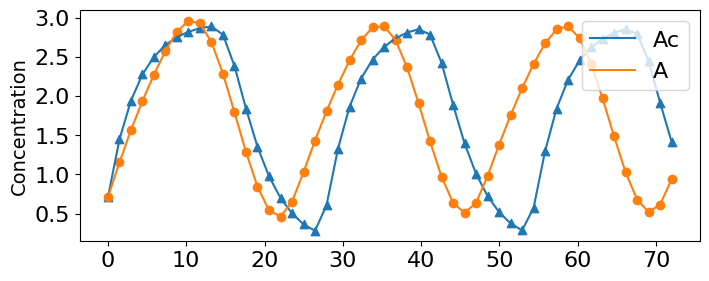

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


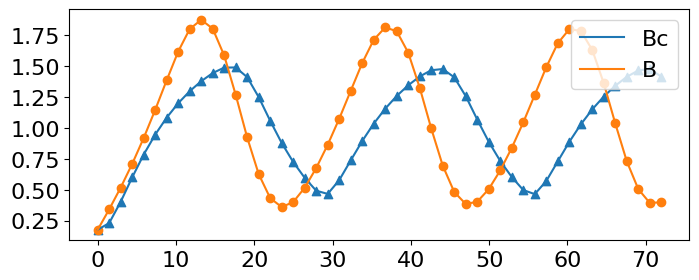

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


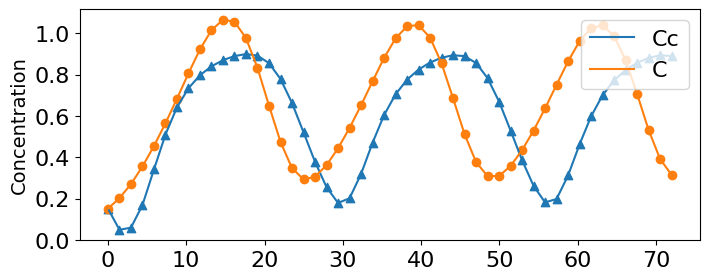

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


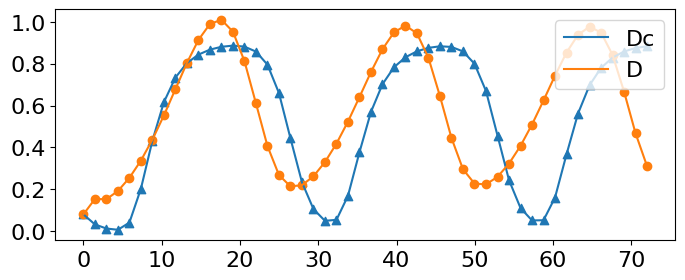

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


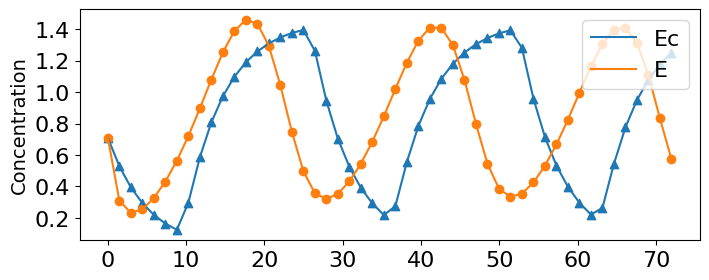

In [2]:
plotSolution([])